In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import plotly.express as px

In [2]:
df = pd.read_csv(r'C:\Users\Shivam Jong Suk\Downloads\data.csv')

In [3]:
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108045,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [4]:
df.shape

(2227, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [6]:
df.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [7]:
df.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
cor = df.corr()

<AxesSubplot:>

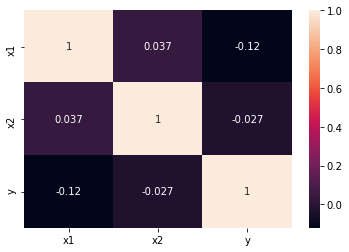

In [10]:
sns.heatmap(cor, annot = True)

<AxesSubplot:xlabel='x1'>

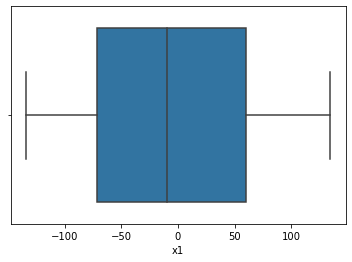

In [11]:
sns.boxplot(x = df['x1'])

<AxesSubplot:xlabel='x2'>

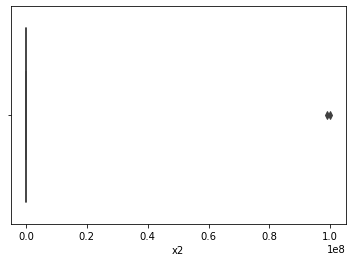

In [12]:
sns.boxplot(x = df['x2'])

In [13]:
df[df['x2']>200]

,x1,x2,y
1541,66.633331,99009998.0,0
2226,109.624009,99999999.0,0


In [14]:
df = df.drop([1541,2226])

In [15]:
(df.x2>200).sum()

0

In [16]:
df.y.unique()

array([1, 0], dtype=int64)

In [17]:
df.describe()

,x1,x2,y
count,2217.000000,2217.000000,2217.000000
mean,-4.855645,-6.730568,0.442490
std,74.917277,79.843938,0.496794
min,-134.369160,-134.876132,0.000000
25%,-71.626564,-80.519315,0.000000
50%,-9.922271,-1.827336,0.000000
75%,59.633331,63.622498,1.000000
max,134.508687,134.929748,1.000000


In [18]:
x = df.drop('y',axis = 1)
y = df['y']

In [19]:
Standardisation = preprocessing.StandardScaler()
x = Standardisation.fit_transform(x)

In [20]:
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size =0.2, random_state = 10, stratify = y)

In [21]:
logreg = LogisticRegression()

In [22]:
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

In [23]:
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
logreg_cv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])})

In [24]:
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.4393970560760795}
Best score is 0.7411203946844911


In [25]:
svm_clf = svm.SVC()

In [26]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
svm_grid = GridSearchCV(svm_clf, param_grid, refit = True, verbose = 3)

In [27]:
svm_grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.932 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.932 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.949 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.955 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.865 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.817 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.882 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.876 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.558 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.952 total time=   0.0s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.944 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.952 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.955 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.930 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.963 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.932 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.946 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.958 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.932 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.927 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.941 total time=   0.0s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [28]:
print(svm_grid.best_params_)
print(svm_grid.best_estimator_)

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.1)


In [29]:
param_grid_linear = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear']} 
svm_grid_linear = GridSearchCV(svm_clf, param_grid_linear, refit = True, verbose = 3)

In [30]:
svm_grid_linear.fit(xtrain,ytrain)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.710 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.727 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.769 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.723 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.746 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.710 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.727 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.769 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.723 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.746 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.710 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

[CV 2/5] END ....C=1000, gamma=1, kernel=linear;, score=0.727 total time=   6.9s
[CV 3/5] END ....C=1000, gamma=1, kernel=linear;, score=0.769 total time=   6.5s
[CV 4/5] END ....C=1000, gamma=1, kernel=linear;, score=0.723 total time=   5.9s
[CV 5/5] END ....C=1000, gamma=1, kernel=linear;, score=0.749 total time=   5.3s
[CV 1/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.710 total time=  12.3s
[CV 2/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.727 total time=   8.3s
[CV 3/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.769 total time=   6.6s
[CV 4/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.723 total time=   6.4s
[CV 5/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.749 total time=   5.7s
[CV 1/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.710 total time=  11.5s
[CV 2/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.727 total time=   6.5s
[CV 3/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.769 total time=   6.5s
[CV 4/5] END .C=1000, gamma=

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [31]:
print(svm_grid_linear.best_params_)
print(svm_grid_linear.best_estimator_)

{'C': 1, 'gamma': 1, 'kernel': 'linear'}
SVC(C=1, gamma=1, kernel='linear')


In [32]:
clf = DecisionTreeClassifier()
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
dt_clf = GridSearchCV(clf, tree_para, cv=5)

In [33]:
dt_clf.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150]})

In [34]:
print(dt_clf.best_params_)

{'criterion': 'gini', 'max_depth': 7}


In [35]:
pred_logreg_cv = logreg_cv.predict(xtest)
pred_svm_grid = svm_grid.predict(xtest)
pred_svm_grid_linear = svm_grid_linear.predict(xtest)
pred_dt_clf = dt_clf.predict(xtest)

In [36]:
cm_logreg_cv = confusion_matrix(ytest,pred_logreg_cv)
cm_svm_grid = confusion_matrix(ytest,pred_svm_grid)
cm_svm_grid_linear = confusion_matrix(ytest,pred_svm_grid_linear)
cm_dt_clf = confusion_matrix(ytest,pred_dt_clf)

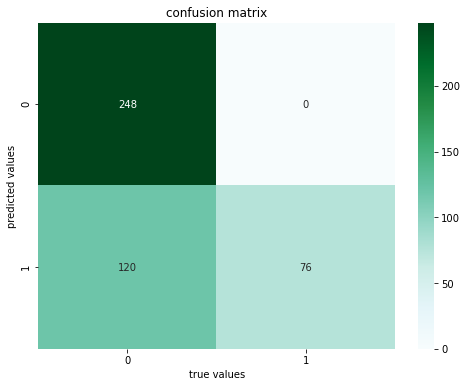

In [37]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_logreg_cv,annot = True, fmt ='d',cmap = "BuGn")
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title('confusion matrix')
plt.show()

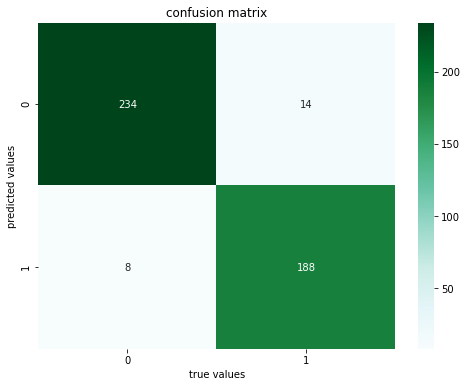

In [38]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_svm_grid,annot = True, fmt ='d',cmap = "BuGn")
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title('confusion matrix')
plt.show()

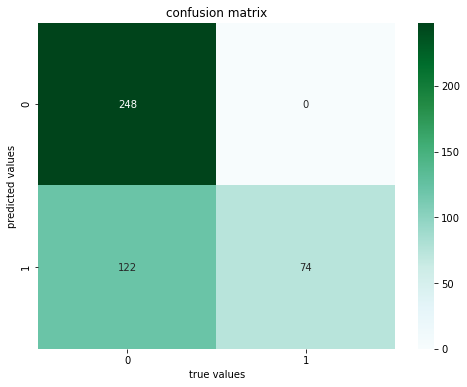

In [39]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_svm_grid_linear,annot = True, fmt ='d',cmap = "BuGn")
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title('confusion matrix')
plt.show()

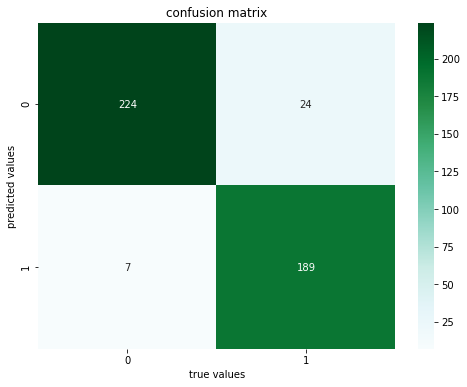

In [40]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_dt_clf,annot = True, fmt ='d',cmap = "BuGn")
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title('confusion matrix')
plt.show()

In [41]:
LogisticRegression = metrics.accuracy_score(ytest, pred_logreg_cv)
SVMrbf = metrics.accuracy_score(ytest, pred_svm_grid)
SVMlinear= metrics.accuracy_score(ytest, pred_svm_grid_linear)
DecisionTree = metrics.accuracy_score(ytest, pred_dt_clf)

In [42]:
print('The Accuracy of Logistic Regression : ',LogisticRegression )
print('The Accuracy of SVM Using rbf : ',SVMrbf)
print('The Accuracy of SVM Using Linear : ',SVMlinear)
print('The Accuracy of Decision Tree : ',DecisionTree)

The Accuracy of Logistic Regression :  0.7297297297297297
The Accuracy of SVM Using rbf :  0.9504504504504504
The Accuracy of SVM Using Linear :  0.7252252252252253
The Accuracy of Decision Tree :  0.9301801801801802


In [43]:
print('The best performing model is SVM using rbf Kernel')

The best performing model is SVM using rbf Kernel


In [44]:
accuracy = [LogisticRegression,SVMrbf,SVMlinear,DecisionTree]
model = ['LogisticRegression','SVMrbf','SVMlinear','DecisionTree']

In [45]:
fig = plt.figure(figsize = (10, 5))


<Figure size 720x360 with 0 Axes>

<BarContainer object of 4 artists>

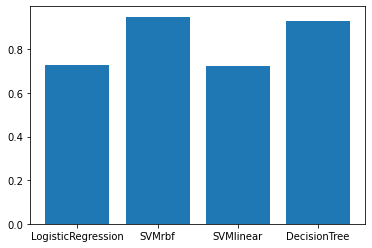

In [46]:
plt.bar(model, accuracy)